## 신경망 모델
#### - 이진 분류 : 유방암 예측 사례

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 데이터 준비

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [5]:
cancer_std = StandardScaler().fit_transform(cancer.data)

#### 1. 데이터를 정규/표준화 하지 않은 경우

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2023
)

- 모델 정의

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense       # Fully Connected Network

# 코렙에서는 빨간 밑줄안뜨는데, vscode에서는 빨간줄뜨지만 실행은 잘됨

In [13]:
model =Sequential([                 #input_dim=30: 30차원으로 두겠다(cancer 데이터가 30차원이라서)
    Dense(100, input_dim=30, activation='relu'),    # 입력 받아들이는 레이어(동시에 몇개를 받아들일것인지)
    Dense(24, activation='relu'),  
    Dense(1, activation='sigmoid')           
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               3100      
                                                                 
 dense_3 (Dense)             (None, 24)                2424      
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5549 (21.68 KB)
Trainable params: 5549 (21.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 모델 설정(컴파일)

In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',      # 이진법?
    metrics=['accuracy']
)
# 3가지를 설정해줌

- 모델 학습

In [16]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,       # 학습중 검증용
                    epochs = 100,               # 반복 횟수
                    batch_size=100)             # 동시에 몇개의 데이터를 메모리에 로드하는가

Epoch 1/100
4/4 [==============================] - 1s 86ms/step - loss: 11.3249 - accuracy: 0.4643 - val_loss: 8.4308 - val_accuracy: 0.4066
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 6.7156 - accuracy: 0.3571 - val_loss: 1.1050 - val_accuracy: 0.6484
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 2.3463 - accuracy: 0.6786 - val_loss: 2.0210 - val_accuracy: 0.6703
Epoch 4/100
4/4 [==============================] - 0s 22ms/step - loss: 1.2376 - accuracy: 0.6374 - val_loss: 2.1897 - val_accuracy: 0.4286
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 1.3558 - accuracy: 0.5302 - val_loss: 0.4173 - val_accuracy: 0.8462
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.9354 - accuracy: 0.8214 - val_loss: 0.9319 - val_accuracy: 0.7802
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.7409 - accuracy: 0.8352 - val_loss: 0.5776 - val_accuracy: 0.7692
Epoch 8/100
4/4 [==

- 모델 평가

In [17]:
model.evaluate(X_test, y_test)
# accuracy: 0.9298 (정확도)

4/4 [==============================] - 0s 3ms/step - loss: 0.1620 - accuracy: 0.9298


[0.16203026473522186, 0.9298245906829834]

- 훈련과정 시각화
    - epoch에 따른 accuracy, val_loss의 변화

In [19]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

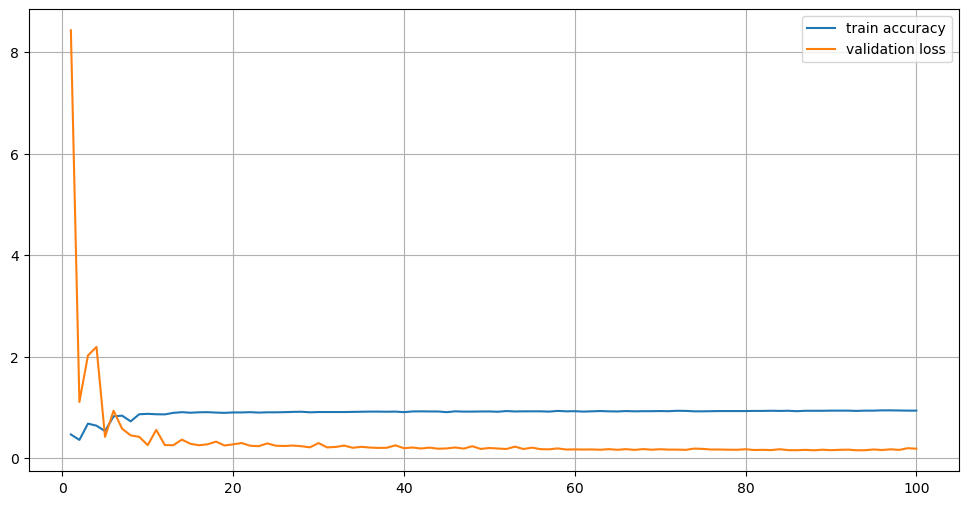

In [20]:
plt.figure(figsize=(12,6))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1]), plt.xlabel('Epoch')
plt.show()